# <center> *Project - Liver Disease Prediction (2020AIML596)*

### <span style='color:Purple'>Overall Approach -
* Import the libraries and Load the dataset 
* Replacing the missing value with Mean<br>
* Removal of Duplicate rows<br>
* Checking initial distribution of features
* Mutivariate analysis and Correlation
* Scaling of Data
* Split features and labels<br>
* Split train and test data<br>

* Implement the Naïve Bayes classifier using Python<br>
a. Implement Naïve Bayes Classifier<br>
b. Calculate accuracy measures<br>

* Implement classification using Logistic Regression using Python<br>
a. Implement Logistic regression Classifier<br>
b. Calculate accuracy measures<br>

* Compare the results and accuracies for both the algorithms 

### Import the libraries 

In [1]:
import numpy             as np
import pandas            as pd
import seaborn           as sns
import matplotlib.pyplot as plt
from matplotlib          import pyplot

# For max displays
pd.set_option('display.max_columns', None)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Splitting of data 
from sklearn.model_selection import train_test_split


# Scaling the data
from sklearn.preprocessing   import MinMaxScaler
from sklearn.preprocessing   import StandardScaler

#importing metrics
from sklearn         import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report

### Load the dataset 

In [2]:
df = pd.read_csv('liver_disease_1.csv')

### Check the shape of the dataset

In [3]:
df.shape

(583, 10)

### Check the first few rows of the dataset

In [4]:
df.head()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0.7,0.1,187,16,18,6.8,3.3,0.90,Yes
1,62,10.9,5.5,699,64,100,7.5,3.2,0.74,Yes
2,62,7.3,4.1,490,60,68,7.0,3.3,0.89,Yes
3,58,1.0,0.4,182,14,20,6.8,3.4,1.00,Yes
4,72,3.9,2.0,195,27,59,7.3,2.4,0.40,Yes


### Retrieving information about the data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Total_Bilirubin             583 non-null    float64
 2   Direct_Bilirubin            583 non-null    float64
 3   Alkaline_Phosphotase        583 non-null    int64  
 4   Alamine_Aminotransferase    583 non-null    int64  
 5   Aspartate_Aminotransferase  583 non-null    int64  
 6   Total_Protiens              583 non-null    float64
 7   Albumin                     583 non-null    float64
 8   Albumin_and_Globulin_Ratio  579 non-null    float64
 9   Dataset                     583 non-null    object 
dtypes: float64(5), int64(4), object(1)
memory usage: 45.7+ KB


### Checking statistical summary of the data

In [6]:
df.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000


### Missing values
<span style='background : yellow' > **Observation:** </span> There are Missing vales in feature 'Albumin_and_Globulin_Ratio', thus replacing it with Mean.

In [7]:
df.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [8]:
# Checking what should be the best replacement for missing values
print(df['Albumin_and_Globulin_Ratio'].mean())
print(df['Albumin_and_Globulin_Ratio'].median())
print(df['Albumin_and_Globulin_Ratio'].mode())

0.9470639032815201
0.93
0    1.0
dtype: float64


In [9]:
# Replacing Missing values with Mean
df['Albumin_and_Globulin_Ratio'] = df['Albumin_and_Globulin_Ratio'].fillna(df['Albumin_and_Globulin_Ratio'].mean())

In [10]:
# Confirming there are no more missing values in the dataset
df.isnull().sum()

Age                           0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

### Checking for duplicate rows

In [11]:
dv = df.duplicated(keep=False)
dv.sum()

26

<span style='background : yellow' > **Observation:**   </span> There are 26 duplicate records i.e. few records are repeating hence, let's keep the first occurence and drop the other occurance

In [12]:
df = df.drop_duplicates(subset=None, keep='first', inplace=False)

In [13]:
df.shape

(570, 10)

### Coverting data type of Label - 'Dataset'

In [14]:
# Converting dtype of output from Object to interger
df['Dataset'] = df['Dataset'].map({'Yes':1 ,'No':0})

### Checking Distribution of Features
<span style='background : yellow' > **Observation:**   </span> Few columns in the dataset are normally distributed but not all. Hence we would further scale the data before building the model.

Age


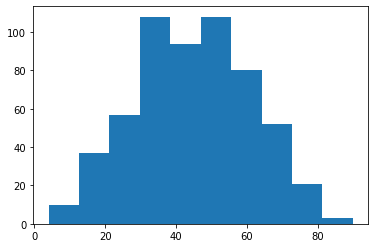

Total_Bilirubin


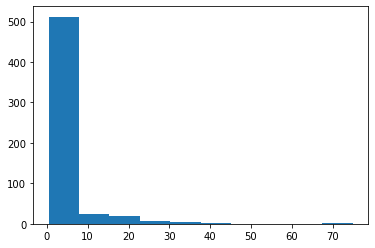

Direct_Bilirubin


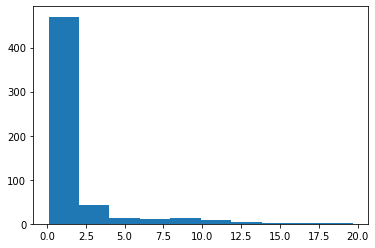

Alkaline_Phosphotase


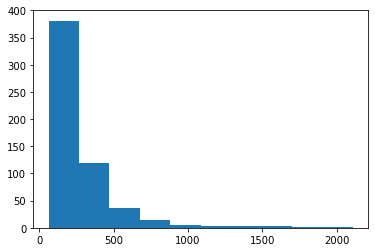

Alamine_Aminotransferase


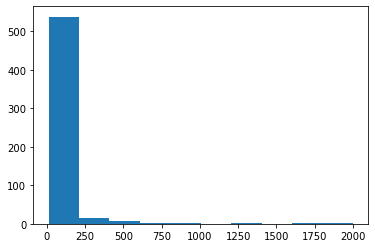

Aspartate_Aminotransferase


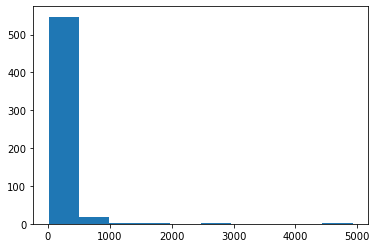

Total_Protiens


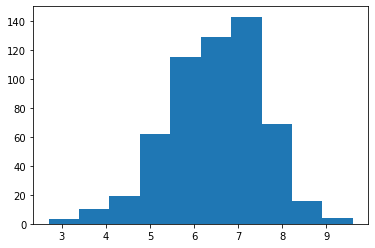

Albumin


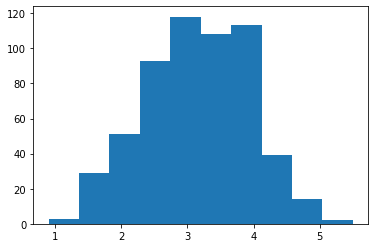

Albumin_and_Globulin_Ratio


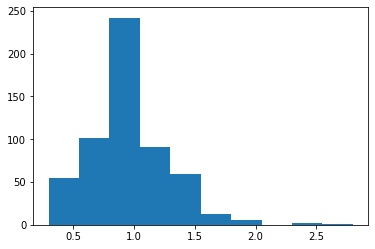

Dataset


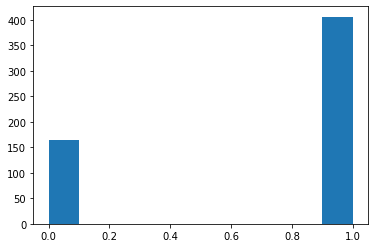

In [15]:
for i in df.columns:
    print(i)
    ax = pyplot.hist(df[i])
    plt.show()

## Multivariate Analysis

<function matplotlib.pyplot.show(close=None, block=None)>

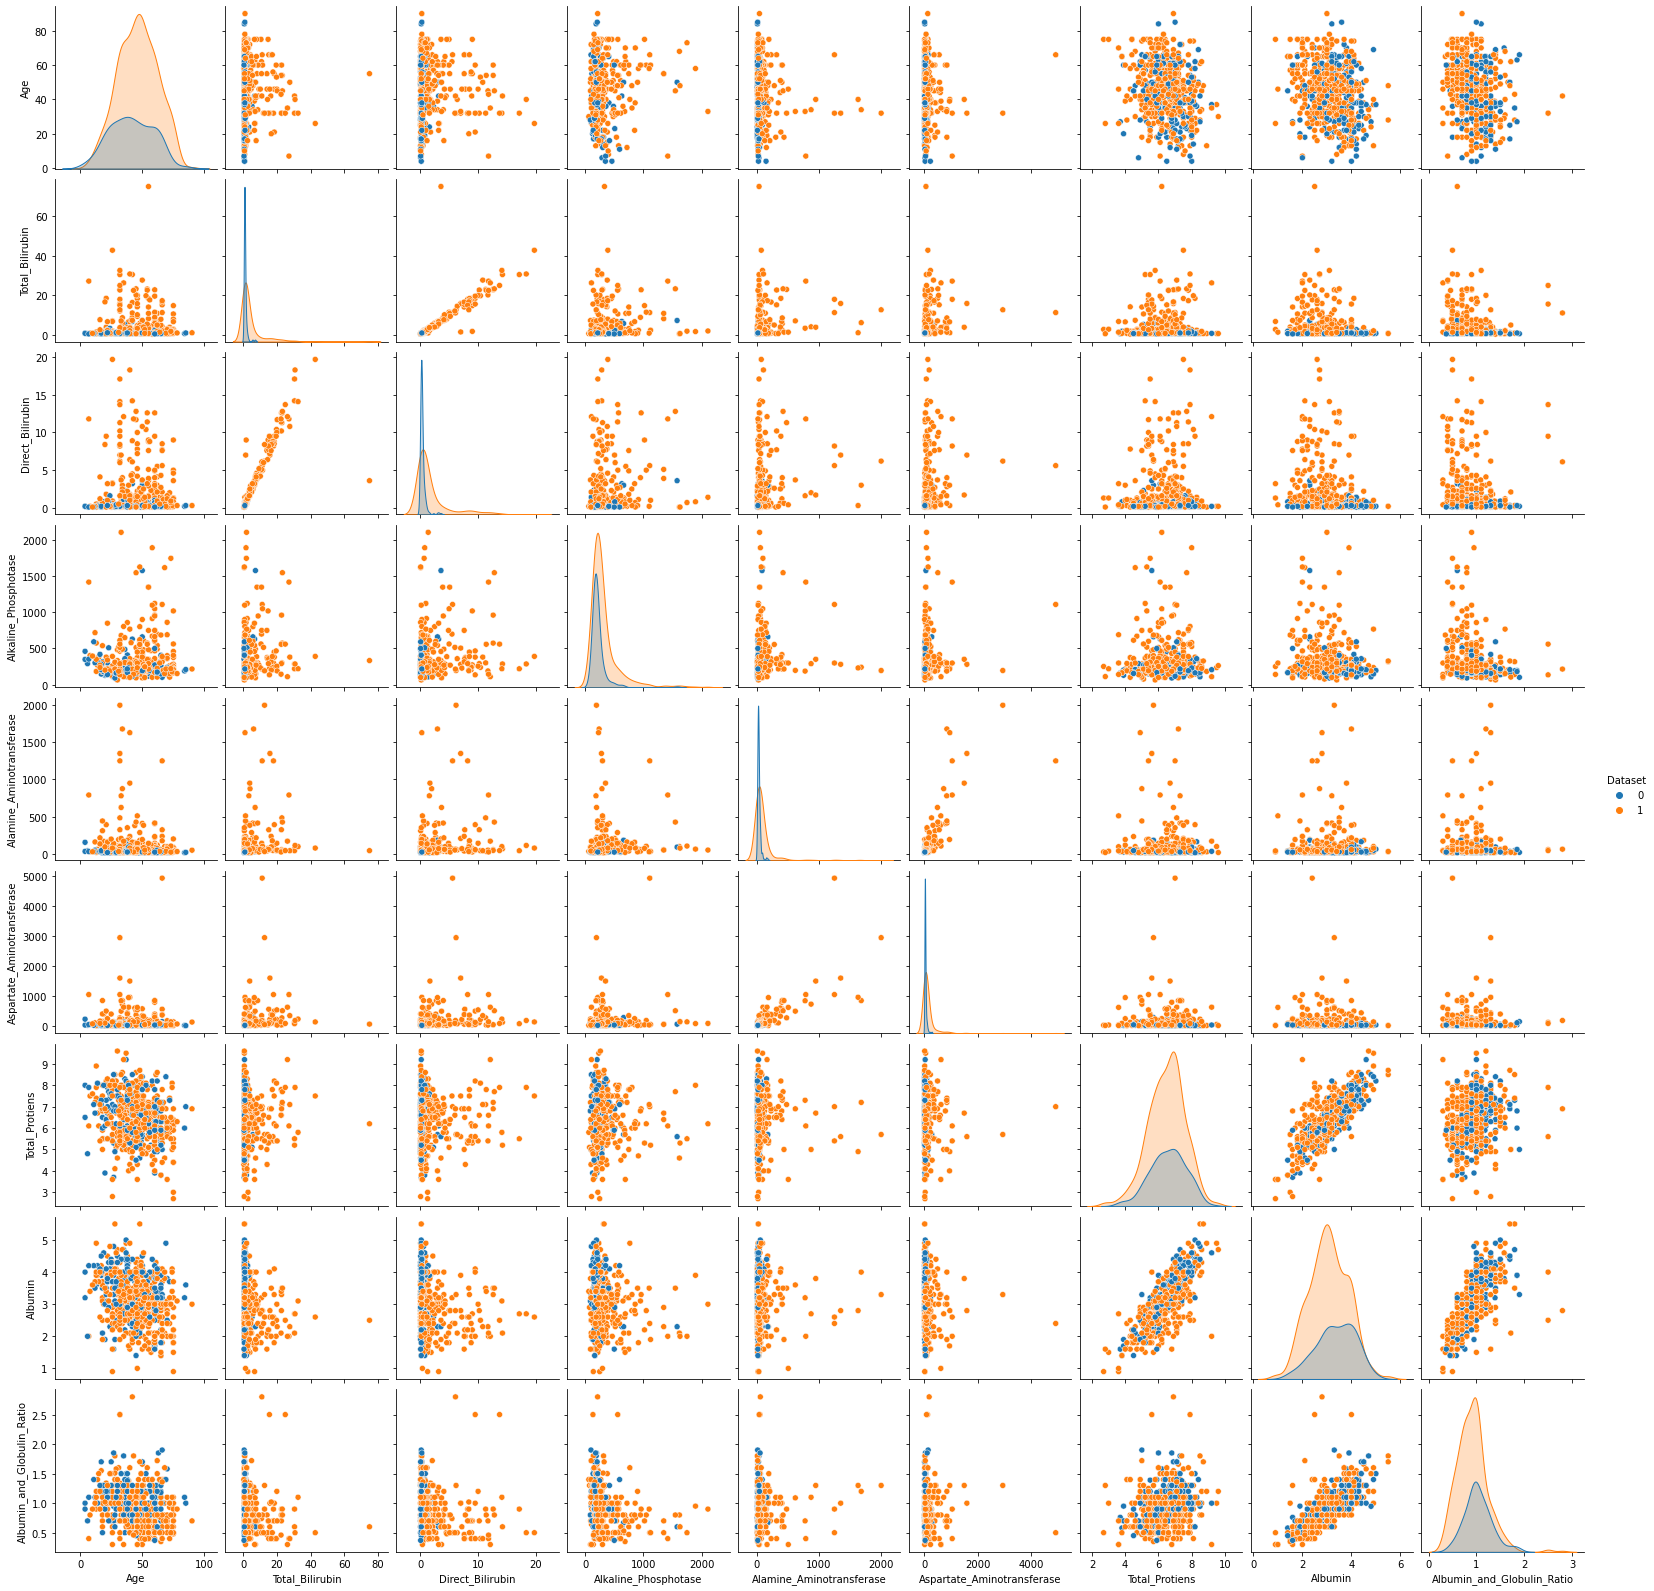

In [16]:
colors = ['red', 'yellow']
sns.pairplot(df, hue = 'Dataset')
plt.show

## HeatMap
<span style='background : yellow' > **Observation:**   </span> 
* Total_Protiens has the lowest correlation with output.
* Albumin and Albumin_and_Globulin_Ration has same correlation with output. Hence dropping 'Albumin'
* Direct_Bilirubin has the most correlation with output.

<AxesSubplot:>

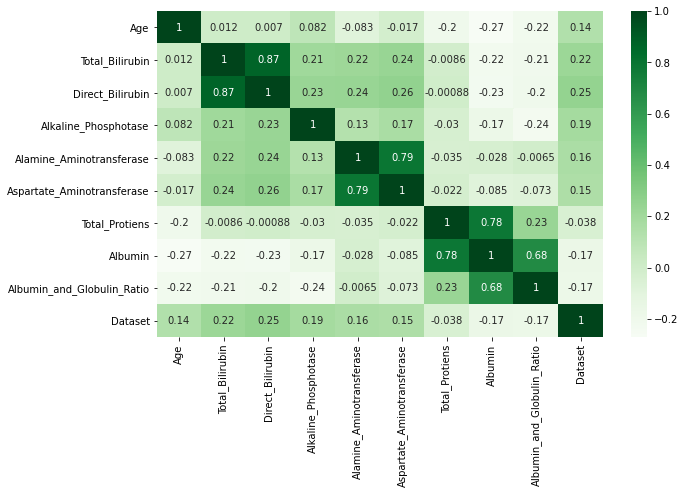

In [17]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(),cmap='Greens', annot=True)

In [18]:
df = df.drop(['Albumin'], axis = 1)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570 entries, 0 to 582
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         570 non-null    int64  
 1   Total_Bilirubin             570 non-null    float64
 2   Direct_Bilirubin            570 non-null    float64
 3   Alkaline_Phosphotase        570 non-null    int64  
 4   Alamine_Aminotransferase    570 non-null    int64  
 5   Aspartate_Aminotransferase  570 non-null    int64  
 6   Total_Protiens              570 non-null    float64
 7   Albumin_and_Globulin_Ratio  570 non-null    float64
 8   Dataset                     570 non-null    int64  
dtypes: float64(4), int64(5)
memory usage: 44.5 KB


## Scaling and Splitting of Dataset - Features & Label

In [20]:
scaler = StandardScaler()
# transform data
df_Scaled = pd.DataFrame(scaler.fit_transform(df), columns = df.columns)

In [21]:
# X would contain all the features and y contains the Label of the dataset.
X = df.drop('Dataset', axis=1)
y = df[['Dataset']]

## Split train and test data

In [22]:
# Spliiting Test and Train by 80/20 ratio. Also used Stratified sampling to have equal proportion in test and test.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, 
                                                    random_state=42,
                                                    stratify = y)

print("Shape of Training set {0}".format(X_train.shape))
print("Shape of Test set {0}".format(X_test.shape))

Shape of Training set (456, 8)
Shape of Test set (114, 8)


## <center><span style='color:Purple'>Naïve Bayes Classifier

### Implement Naïve Bayes Classifier
Out of the three Naive Bayes Classifier (Multinomial, Bernoulli, Gaussian), we would go ahead and implement Gaussian as our dataset is countinuous.

In [23]:
from sklearn.naive_bayes import GaussianNB

# Create Classifier
GNB = GaussianNB()

# Train the model using Training set
GNB.fit(X_train, y_train)

GaussianNB()

In [24]:
# making predictions on the testing set
y_pred = GNB.predict(X_test)

In [25]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)

Gaussian Naive Bayes model accuracy(in %): 60.526315789473685


### Calculate accuracy measures

#### Confusion matrix

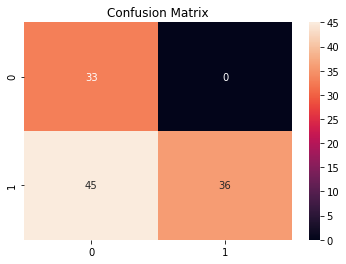

True Positives: 33
False Negatives: 0
False Positives: 45
True Negatives: 36


In [26]:
cnf_matrix = confusion_matrix(y_test, y_pred)

sns.heatmap(cnf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.show()

print('True Positives:', cnf_matrix[0,0])
print('False Negatives:', cnf_matrix[0,1])
print('False Positives:', cnf_matrix[1,0])
print('True Negatives:', cnf_matrix[1,1])

#### AUC

In [27]:
print('\nAUC: {:.2f}\n'.format(roc_auc_score(y_test, y_pred)))


AUC: 0.72



#### Classification Report

In [28]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))


Classification Report

              precision    recall  f1-score   support

           0       0.42      1.00      0.59        33
           1       1.00      0.44      0.62        81

    accuracy                           0.61       114
   macro avg       0.71      0.72      0.60       114
weighted avg       0.83      0.61      0.61       114



## <center><span style='color:Purple'>Logistic Regression Classifier



### Implement Logistic regression Classifier

In [29]:
# Spliiting Test and Train by 80:20 ratio. Also used Stratified sampling to have equal proportion in test and test.
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X, y, test_size=0.20, 
                                                    random_state=42,
                                                    stratify = y)

print("Shape of Training set {0}".format(X_train_LR.shape))
print("Shape of Test set {0}".format(X_test_LR.shape))

Shape of Training set (456, 8)
Shape of Test set (114, 8)


In [30]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

# Train the model using Training set
LR.fit(X_train_LR, y_train_LR)

LogisticRegression()

In [31]:
# making predictions on the testing set
y_pred_LR = LR.predict(X_test_LR)

In [32]:
# comparing actual response values (y_test) with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):", metrics.accuracy_score(y_test_LR, y_pred_LR)*100)

Logistic Regression model accuracy(in %): 74.56140350877193


### Calculate accuracy measures

#### Confusion Matrix

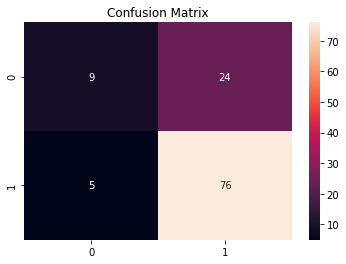

True Positives: 9
False Negatives: 24
False Positives: 5
True Negatives: 76


In [33]:
cnf_matrix = confusion_matrix(y_test_LR, y_pred_LR)

sns.heatmap(cnf_matrix, annot=True)
plt.title('Confusion Matrix')
plt.show()

print('True Positives:', cnf_matrix[0,0])
print('False Negatives:', cnf_matrix[0,1])
print('False Positives:', cnf_matrix[1,0])
print('True Negatives:', cnf_matrix[1,1])

#### AUC

In [34]:
print('AUC: {:.2f}'.format(roc_auc_score(y_test_LR, y_pred_LR)))

AUC: 0.61


#### Classification Report

In [35]:
print('\nClassification Report\n')
print(classification_report(y_test, y_pred))


Classification Report

              precision    recall  f1-score   support

           0       0.42      1.00      0.59        33
           1       1.00      0.44      0.62        81

    accuracy                           0.61       114
   macro avg       0.71      0.72      0.60       114
weighted avg       0.83      0.61      0.61       114



## <Center><span style='color:Purple'>Conclusion

### Naive Bayes

Accuracy: 0.61<br>
AUC: 0.72<br>
Precision: 1.00<br>
Recall: 0.44<br>
F1-score: 0.62<br>
Weighted Precision: 0.83<br>
Weighted Recall: 0.61<br>
Weighted F1-score: 0.61<br>

### Logistic regression

Accuracy: 0.75<br>
AUC: 0.61<br>
Precision: 0.76<br>
Recall: 0.94<br>
F1-score: 0.84<br>
Weighted Precision: 0.73<br>
Weighted Recall: 0.75<br>
Weighted F1-score: 0.71<br>

### <span style='color:Green'> Conclusion - For the given dataset, Logistic Regression Classifier suits best for predicting Liver Disease. </span>
